In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from log_data import log_data_position

%matplotlib inline
#%matplotlib gtk

In [116]:
from scipy import signal

In [57]:
plt.style.use('seaborn-poster')

In [58]:
def normalize_val(data):
    data_max = np.max(data)
    data_min = np.min(data)
    data = 2*(data-data_min)/(data_max-data_min) -1
    return data

# Position Control

In [141]:
with open("/home/arclab/catkin_ws/position_control.pkl",'rb') as input:
    LogData = pickle.load(input, encoding='latin1')

### Joint Angles

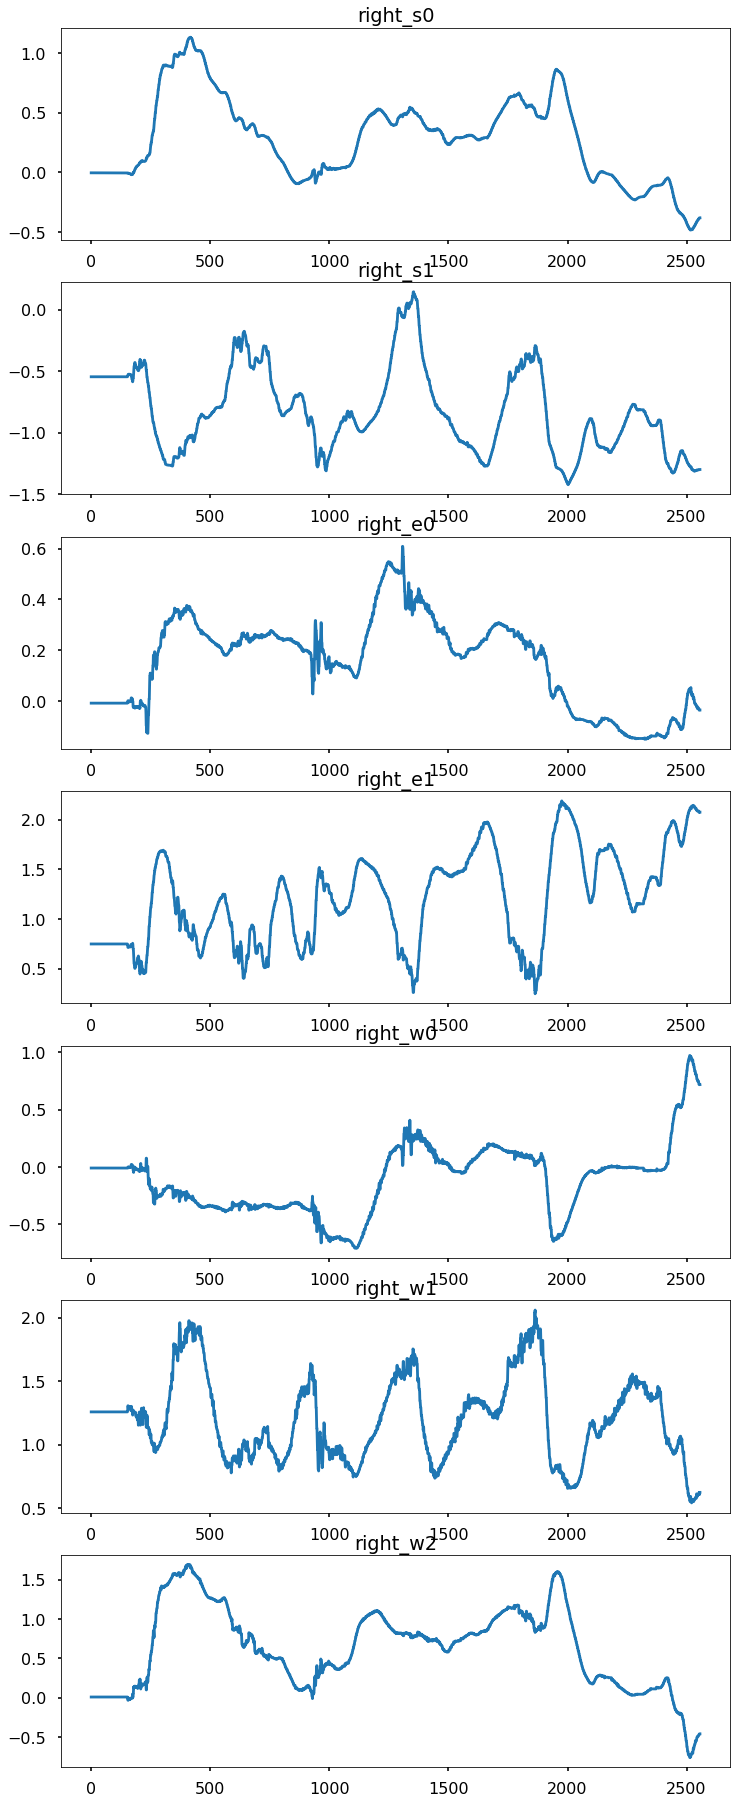

In [143]:
b_joint_angle_position = np.asarray(LogData.baxter_joint_angles)

fig,ax = plt.subplots(7,1,figsize=(12,32))
title_list = ['right_s0', 'right_s1', 'right_e0', 'right_e1', 'right_w0', 'right_w1', 'right_w2']

for i in range(7):
    ax[i].plot(range(b_joint_angle_position.shape[0]),b_joint_angle_position[:,i])
    ax[i].set_title(title_list[i])

### Spectral analysis of joint angles

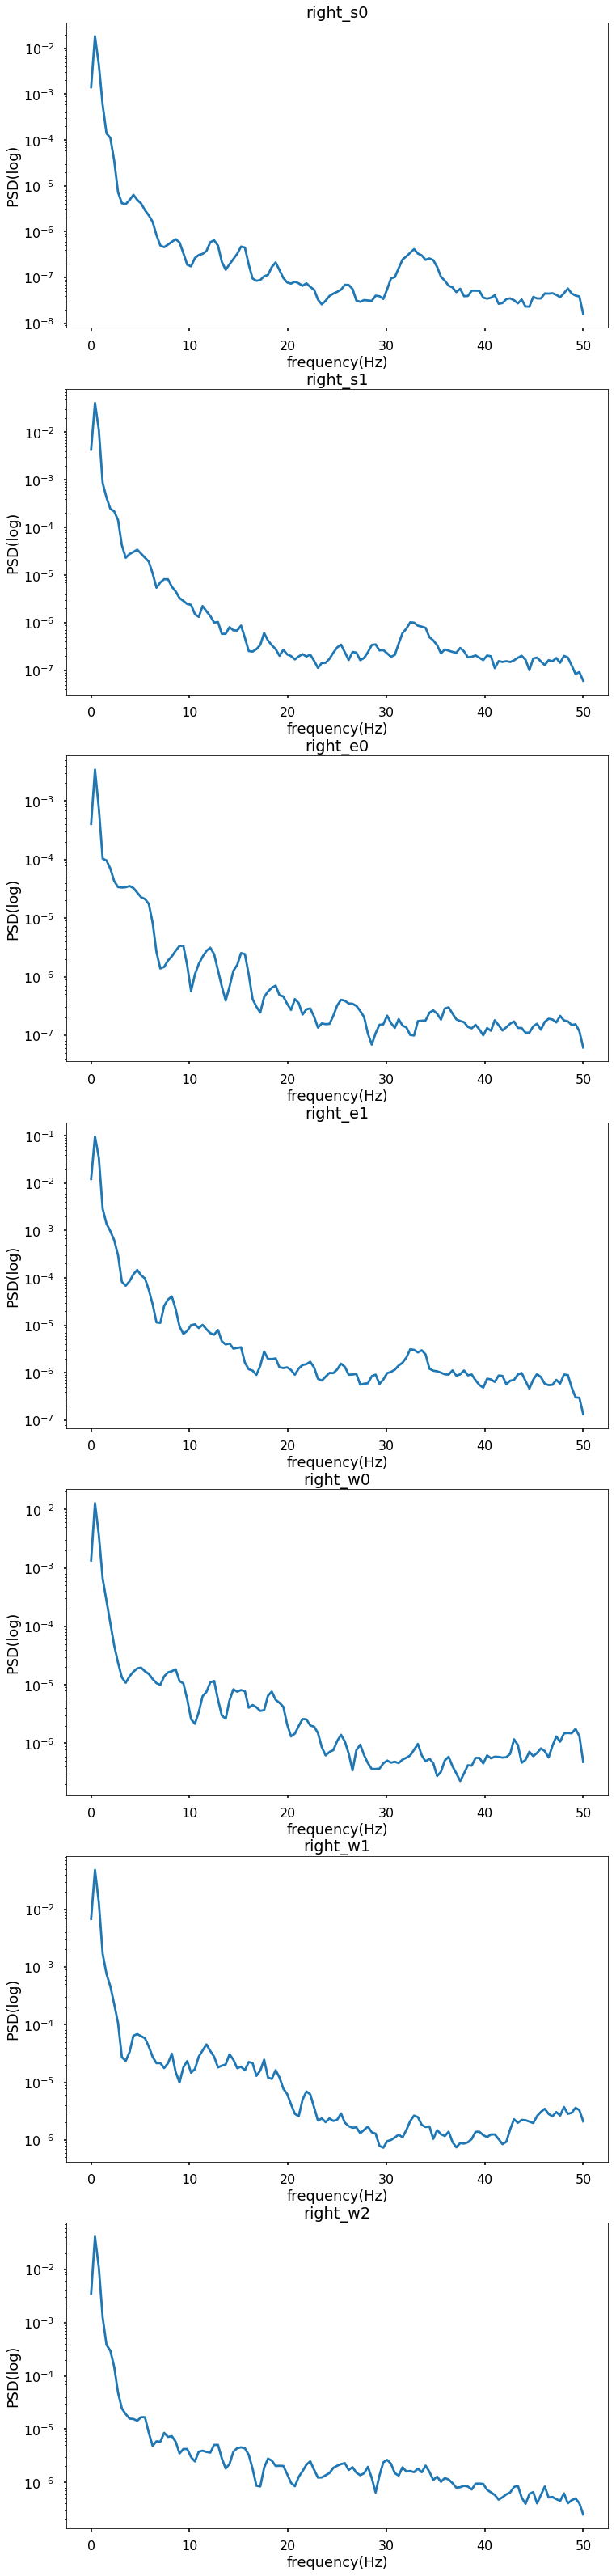

In [144]:
fs = 100

fig,ax = plt.subplots(7,1,figsize=(12,57))
title_list = ['right_s0', 'right_s1', 'right_e0', 'right_e1', 'right_w0', 'right_w1', 'right_w2']

for i in range(7):
    f, Pwelch_spec = signal.welch(b_joint_angle_position[:,i],fs,scaling='spectrum')
    ax[i].semilogy(f, Pwelch_spec)
    ax[i].set_xlabel('frequency(Hz)')
    ax[i].set_ylabel('PSD(log)')
    ax[i].set_title(title_list[i])

### Filter Design for joint angles

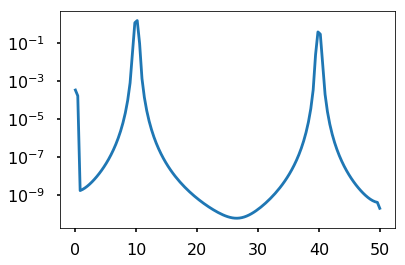

In [103]:
Fs = 100
n = np.arange(1000)
x = 2*np.sin(2*np.pi*n*(10/Fs))+np.sin(2*np.pi*n*(40/Fs))
plt.figure
f, Pwelch_spec = signal.welch(x,Fs,scaling='spectrum')
plt.semilogy(f, Pwelch_spec)
plt.show()
b,a = signal.butter(14,0.5, btype = 'low')
zi = signal.lfilter(b,a)
z,_ = signal.lfilter(b,a,x, zi = zi*x[0])

filtered_signal = signal.

/home/arclab/.local/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


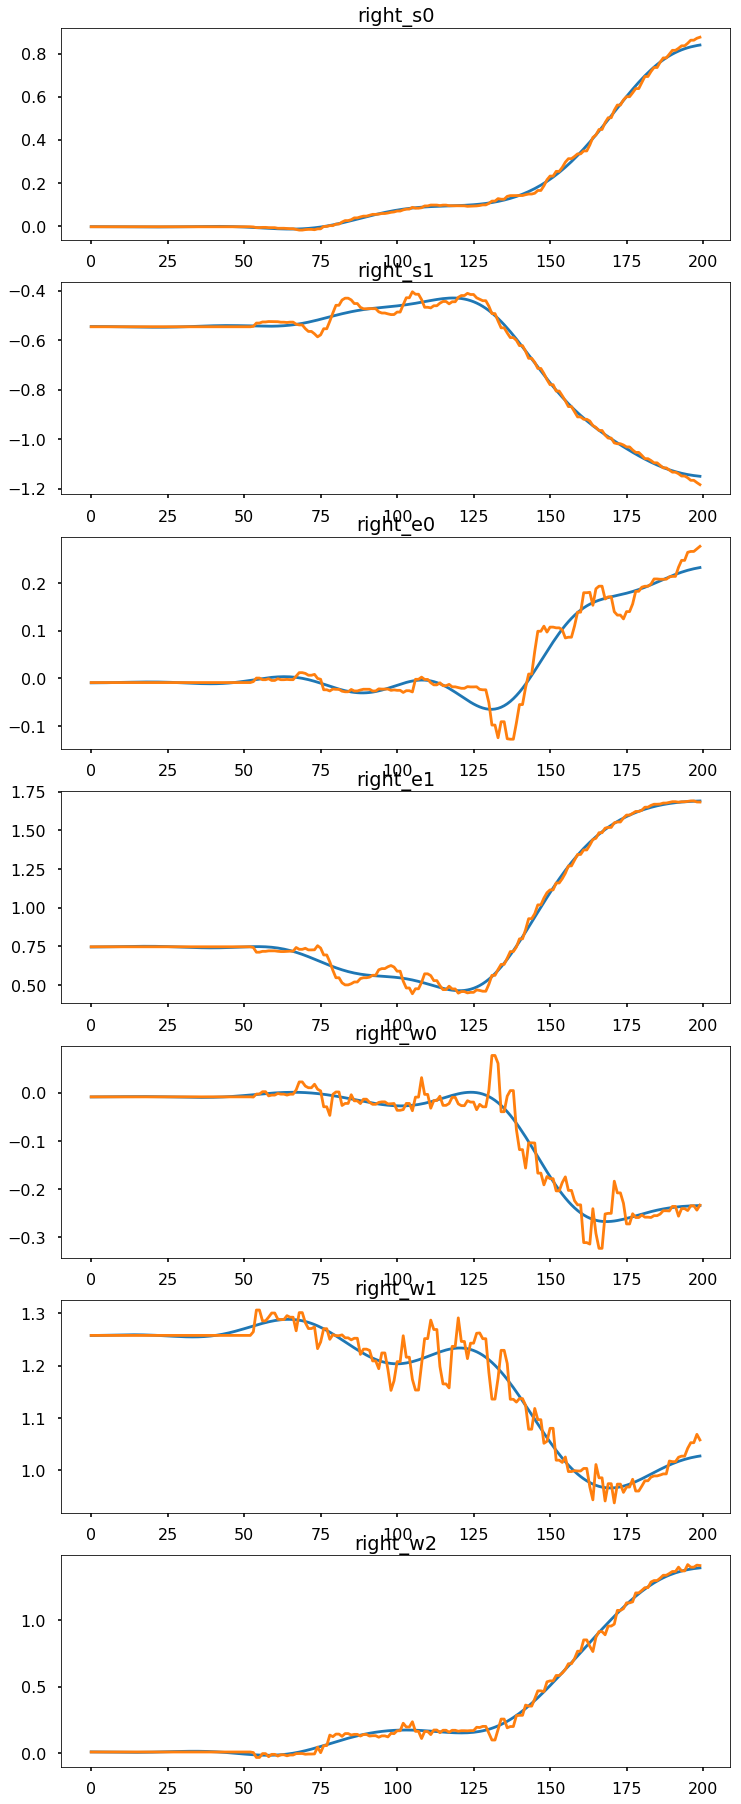

In [145]:
#b1 = signal.firwin(11,0.1,fs=100)
b,a = signal.butter(7,0.05, btype='low')
zi = signal.lfilter_zi(b,a)
b_joint_angle_position = np.asarray(LogData.baxter_joint_angles)

fig,ax = plt.subplots(7,1,figsize=(12,32))
title_list = ['right_s0', 'right_s1', 'right_e0', 'right_e1', 'right_w0', 'right_w1', 'right_w2']

for i in range(7):
    joint_angle = b_joint_angle_position[100:300,i]
    #filter_signal,_= signal.lfilter(b,a,joint_angle,zi = zi*joint_angle[0])
    filter_signal = signal.filtfilt(b,a,joint_angle)
    ax[i].plot(range(filter_signal.shape[0]),filter_signal)
    ax[i].plot(range(joint_angle.shape[0]),joint_angle)
    ax[i].set_title(title_list[i])


In [139]:
filter_signal[-1]

0.8841412801673418

### Desired and Baxter Position 

Mean-squared Error 0.0060190952426882535


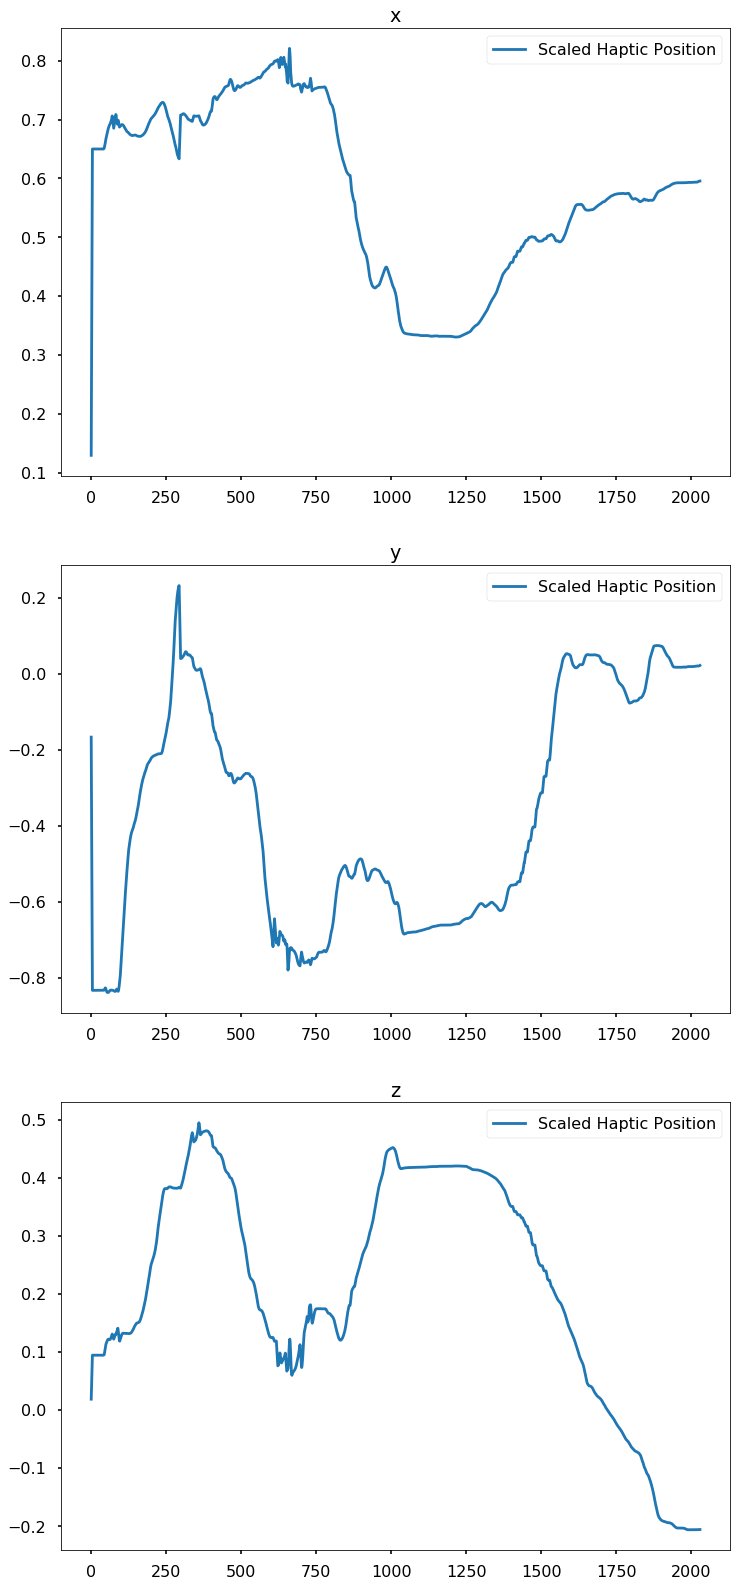

In [55]:
haptic_position = np.asarray(LogData.haptic_pos)[:,0:3]
baxter_position = np.asarray(LogData.baxter_pos)[:,0:3]

fig,ax = plt.subplots(3,1,figsize=(12,28))
title_list = ['x','y','z']
for i in range(3):
    ax[i].plot(range(haptic_position.shape[0]),haptic_position[:,i])
    #ax[i].plot(range(baxter_position.shape[0]),baxter_position[:,i])
    ax[i].set_title(title_list[i])
    ax[i].legend(['Scaled Haptic Position','Baxter Position'])

print("Mean-squared Error {}".format(np.mean(np.sum((haptic_position-baxter_position)**2,axis=1))))

# Torque Control

In [252]:
with open("/home/arclab/catkin_ws/torque_control.pkl",'rb') as input:
    LogData = pickle.load(input, encoding='latin1')
    
Fs = 500

### Position and orientation

Mean-squared Error 29.07423805661457
Mean-squared Error 29.07423805661457


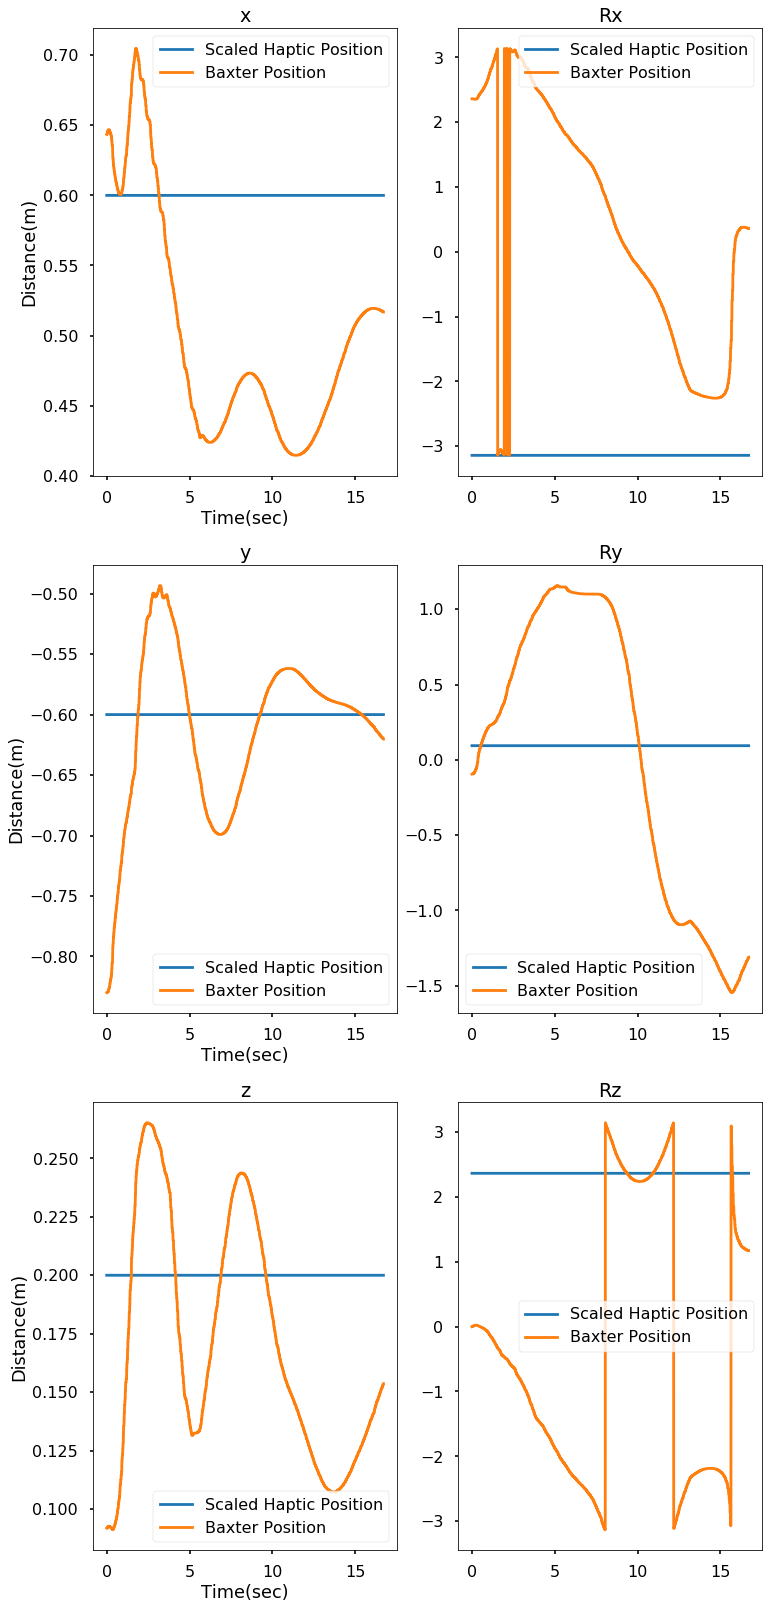

In [253]:
haptic_position = np.asarray(LogData.haptic_pos)[:,0:3]
baxter_position = np.asarray(LogData.baxter_pos)[:,0:3]

fig,ax = plt.subplots(3,2,figsize=(12,28))
title_list = ['x','y','z']
j=0
for i in range(3):
    ax[i,j].plot(np.arange(haptic_position.shape[0])*(1/Fs),haptic_position[:,i])
    ax[i,j].plot(np.arange(baxter_position.shape[0])*(1/Fs),baxter_position[:,i])
    ax[i,j].set_title(title_list[i])
    ax[i,j].set_xlabel('Time(sec)')
    ax[i,j].set_ylabel('Distance(m)')
    ax[i,j].legend(['Scaled Haptic Position','Baxter Position'])

haptic_position = np.asarray(LogData.haptic_pos)[:,3:6]
baxter_position = np.asarray(LogData.baxter_pos)[:,3:6]

title_list = ['Rx','Ry','Rz']
j=1
for i in range(3):
    ax[i,j].plot(np.arange(haptic_position.shape[0])*(1/Fs),haptic_position[:,i])
    ax[i,j].plot(np.arange(baxter_position.shape[0])*(1/Fs),baxter_position[:,i])
    ax[i,j].set_title(title_list[i])
    ax[i,j].legend(['Scaled Haptic Position','Baxter Position'])

print("Mean-squared Error {}".format(np.mean(np.sum((haptic_position-baxter_position)**2,axis=1))))    
print("Mean-squared Error {}".format(np.mean(np.sum((haptic_position-baxter_position)**2,axis=1))))

### $\Delta \theta$ and  $\Delta x$

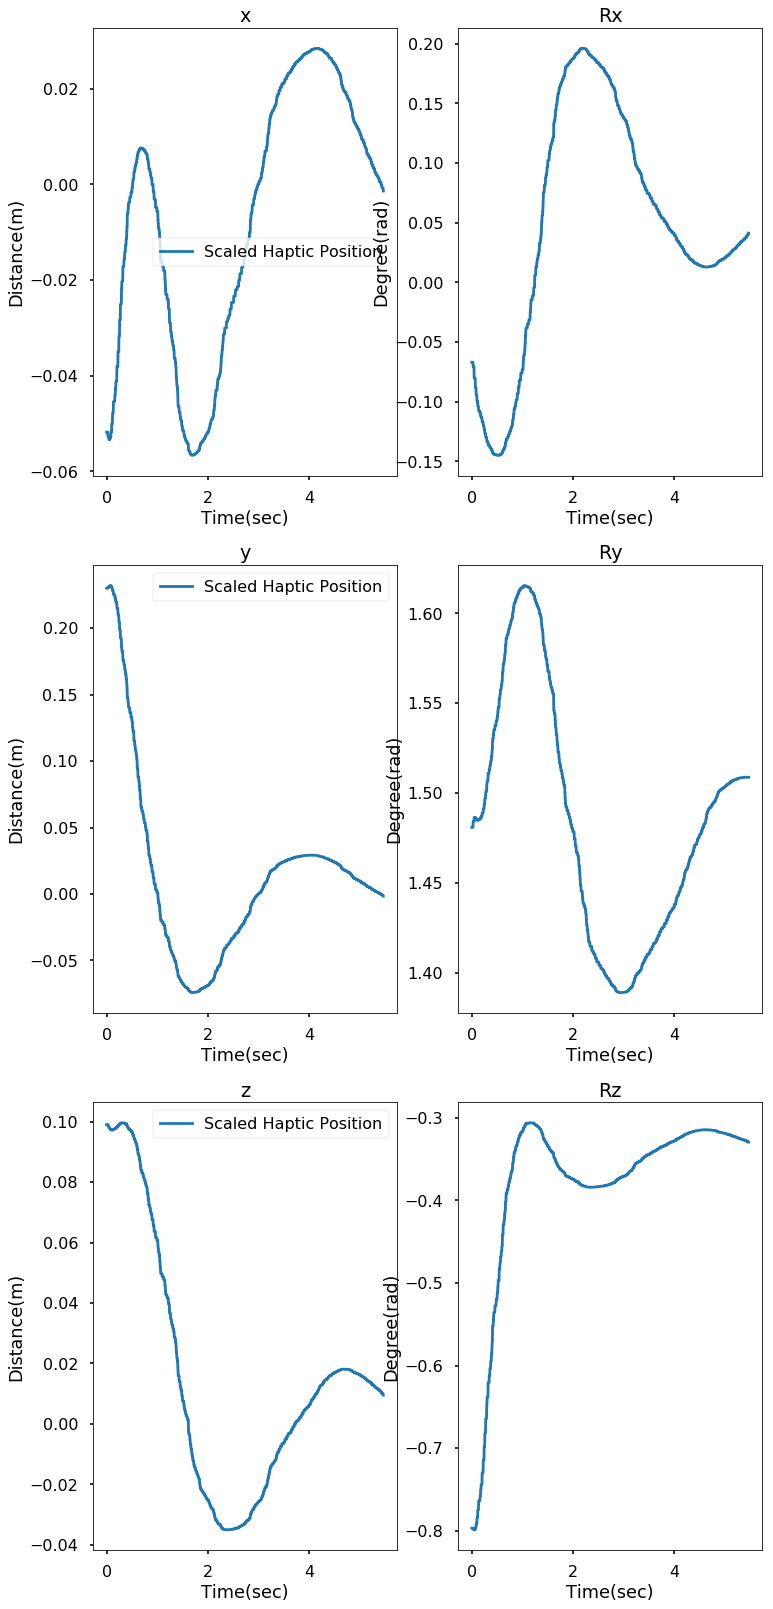

In [250]:
delta_pose = np.asarray(LogData.delta_pos)

fig,ax = plt.subplots(3,2,figsize=(12,28))
title_list = ['x','y','z','Rx','Ry','Rz']
j=0
for i in range(3):
    ax[i,j].plot(np.arange(delta_pose.shape[0])*(1/Fs),delta_pose[:,i])
    ax[i,j].set_title(title_list[i])
    ax[i,j].set_xlabel('Time(sec)')
    ax[i,j].set_ylabel('Distance(m)')
    ax[i,j].legend(['Scaled Haptic Position','Baxter Position'])

j=1
for i in range(3,6):
    ax[i-3,j].plot(np.arange(delta_pose.shape[0])*(1/Fs), delta_pose[:,i])
    ax[i-3,j].set_title(title_list[i])
    ax[i-3,j].set_xlabel('Time(sec)')
    ax[i-3,j].set_ylabel('Degree(rad)')

In [ ]:
delta_theta = np.asarray(LogData.delta_vel)[:,3:6]

title_list = ['Rx','Ry','Rz']
j=1
for i in range(3):
    ax[i,j].plot(np.arange(delta_pose.shape[0])*(1/Fs),delta_pose[:,i])
    ax[i,j].plot(np.arange(delta_theta.shape[0])*(1/Fs),delta_theta[:,i])
    ax[i,j].set_title(title_list[i])
    ax[i,j].legend(['Scaled Haptic Position','Baxter Position'])

print("Mean-squared Error {}".format(np.mean(np.sum((delta_pose-delta_theta)**2,axis=1))))    
print("Mean-squared Error {}".format(np.mean(np.sum((delta_pose-delta_theta)**2,axis=1))))

### Force and Torque

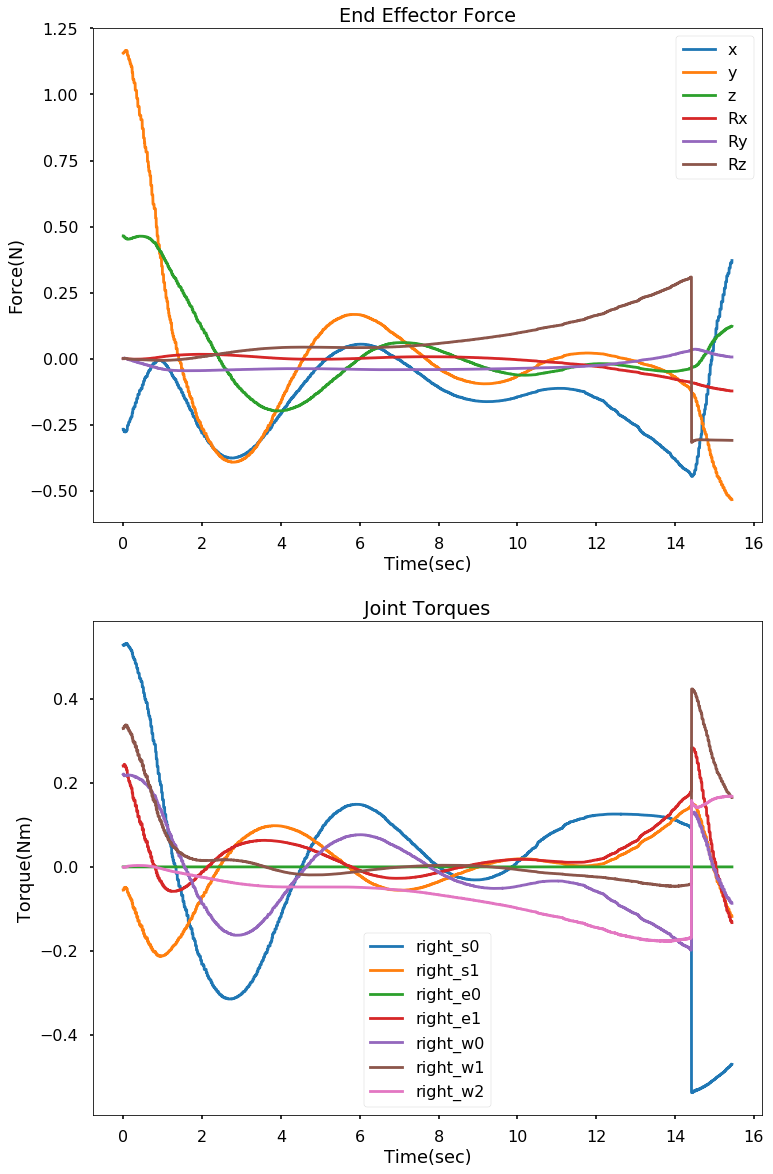

In [223]:
fig,ax = plt.subplots(2,1,figsize=(12,20))

endeffector_force = np.asarray(LogData.force)
title_list = ['x','y','z','Rx','Ry','Rz']
for i in range(6):
    ax[0].plot(np.arange(endeffector_force.shape[0])*(1/Fs),endeffector_force[:,i])
ax[0].legend(title_list)
ax[0].set_title('End Effector Force')
ax[0].set_ylabel('Force(N)')

joint_torques = np.asarray(LogData.torque)
title_list = ['right_s0', 'right_s1', 'right_e0', 'right_e1', 'right_w0', 'right_w1', 'right_w2']
for i in range(7):
    ax[1].plot(np.arange(joint_torques.shape[0])*(1/Fs),joint_torques[:,i])
ax[1].legend(title_list)
ax[1].set_title('Joint Torques')
ax[1].set_ylabel('Torque(Nm)')

for axis in ax:
    axis.set_xlabel('Time(sec)')

#fig.savefig("ForceAndTorque3.png")